===== DATASET AWAL =====


,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


✅ Data berhasil diproses dan dibagi menjadi train/test.
===== Logistic Regression =====
Akurasi : 0.6875

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        21
           1       0.55      0.55      0.55        11

    accuracy                           0.69        32
   macro avg       0.65      0.65      0.65        32
weighted avg       0.69      0.69      0.69        32


===== Decision Tree =====
Akurasi : 0.7188

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.67      0.36      0.47        11

    accuracy                           0.72        32
   macro avg       0.70      0.63      0.64        32
weighted avg       0.71      0.72      0.69        32



/tmp/ipykernel_24167/1957349547.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_24167/1957349547.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

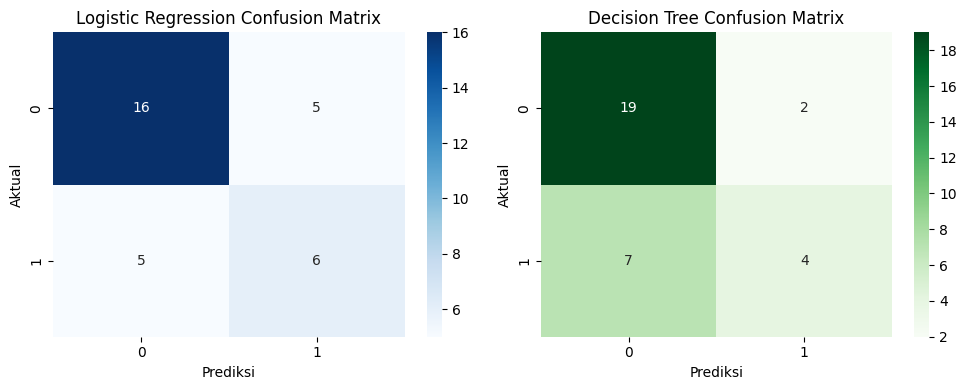

,Model,Akurasi
0,Logistic Regression,0.68750
1,Decision Tree,0.71875


In [1]:
# ============================================================
# Model Klasifikasi Titanic: Logistic Regression & Decision Tree
# ============================================================

# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tampilkan grafik langsung di notebook
%matplotlib inline

# ============================================================
# 1️⃣ Baca Dataset
# ============================================================
df = pd.read_csv("titanic.csv")

print("===== DATASET AWAL =====")
display(df.head())

# ============================================================
# 2️⃣ Preprocessing Data
# ============================================================
# Hapus kolom yang tidak relevan
df = df.drop(columns=['Lname', 'Name', 'Ticket', 'Cabin'])

# Isi nilai kosong
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Konversi kategori ke numerik
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])           # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked']) # C=0, Q=1, S=2 (urutan bisa berbeda)

# Pisahkan fitur & target
X = df.drop(columns=['Survived'])
y = df['Survived']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Data berhasil diproses dan dibagi menjadi train/test.")

# ============================================================
# 3️⃣ Model 1: Logistic Regression
# ============================================================
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# ============================================================
# 4️⃣ Model 2: Decision Tree
# ============================================================
tree_model = DecisionTreeClassifier(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# ============================================================
# 5️⃣ Evaluasi Model
# ============================================================
print("===== Logistic Regression =====")
print(f"Akurasi : {accuracy_score(y_test, y_pred_log):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

print("\n===== Decision Tree =====")
print(f"Akurasi : {accuracy_score(y_test, y_pred_tree):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

# ============================================================
# 6️⃣ Visualisasi Confusion Matrix
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Prediksi")
axes[0].set_ylabel("Aktual")

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Prediksi")
axes[1].set_ylabel("Aktual")

plt.tight_layout()
plt.show()

# ============================================================
# 7️⃣ Perbandingan Akurasi
# ============================================================
akurasi_log = accuracy_score(y_test, y_pred_log)
akurasi_tree = accuracy_score(y_test, y_pred_tree)

pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Akurasi": [akurasi_log, akurasi_tree]
})
